In [ ]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

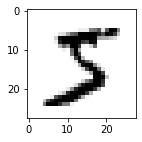

In [ ]:
digit = train_images[0]
plt.figure(figsize=(2,2))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

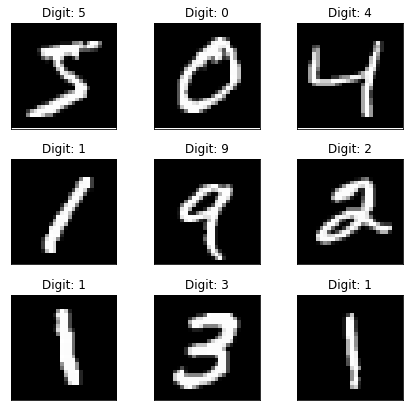

In [ ]:
plt.figure(figsize=(6,6))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
train_images.shape

(60000, 784)

In [ ]:
# Preparing the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Sequential API

In [ ]:
# The network architecture
seq_model = keras.models.Sequential()
seq_model.add(keras.layers.Dense(512, activation='relu',input_shape=(28 * 28,)))
seq_model.add(keras.layers.Dense(128, activation='relu'))
seq_model.add(keras.layers.Dense(10, activation='softmax'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


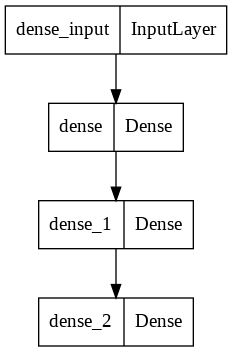

In [ ]:
from tensorflow.keras.utils import plot_model
seq_model.summary()
plot_model(seq_model,to_file='sequential_spi.png')

In [ ]:
# The compilation step
seq_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# The training step
seq_history = seq_model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 6ms/step - loss: 0.2285 - accuracy: 0.9313 - val_loss: 0.1346 - val_accuracy: 0.9566
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0873 - accuracy: 0.9729 - val_loss: 0.0746 - val_accuracy: 0.9771
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0561 - accuracy: 0.9825 - val_loss: 0.0713 - val_accuracy: 0.9774
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0408 - accuracy: 0.9877 - val_loss: 0.0687 - val_accuracy: 0.9800
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0297 - accuracy: 0.9911 - val_loss: 0.0726 - val_accuracy: 0.9809


In [ ]:
# The testing step
test_loss, test_acc = seq_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9809
test_acc: 0.98089998960495
test_loss: 0.07264049351215363


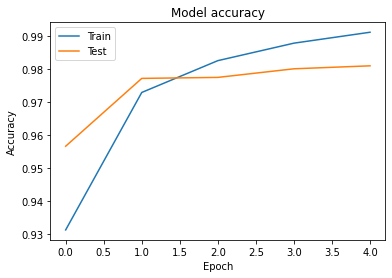

In [ ]:
plt.plot(seq_history.history['accuracy'])
plt.plot(seq_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

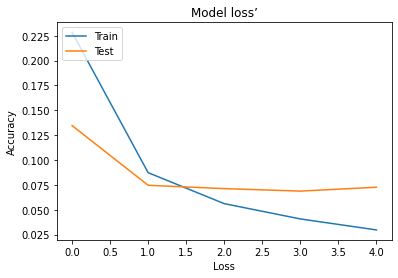

In [ ]:
plt.plot(seq_history.history['loss'])
plt.plot(seq_history.history['val_loss'])
plt.title('Model loss’')
plt.ylabel('Accuracy')
plt.xlabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Functional API

In [ ]:
# The network architecture
input_layer = keras.layers.Input(shape=(28 * 28,))
Layer_1 = keras.layers.Dense(512, activation="relu")(input_layer)
Layer_2 = keras.layers.Dense(128, activation="relu")(Layer_1)
output_layer= keras.layers.Dense(10, activation="softmax")(Layer_2)

In [ ]:
# Defining the model by specifying the input and output layers
func_model = keras.models.Model(inputs=input_layer, outputs=output_layer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 128)               65664     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


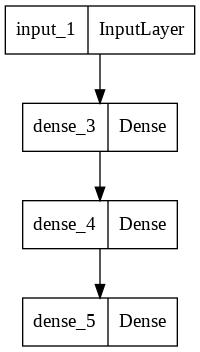

In [ ]:
func_model.summary()
plot_model(func_model,to_file='functional_api.png')

In [ ]:
# The compilation step
func_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# The training step
func_model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2312 - accuracy: 0.9309 - val_loss: 0.1120 - val_accuracy: 0.9642
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0858 - accuracy: 0.9736 - val_loss: 0.0807 - val_accuracy: 0.9759
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0679 - val_accuracy: 0.9803
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9873 - val_loss: 0.0718 - val_accuracy: 0.9792
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0637 - val_accuracy: 0.9821


In [ ]:
# The testing step
test_loss, test_acc = func_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0637 - accuracy: 0.9821
test_acc: 0.9821000099182129
test_loss: 0.06370143592357635


# Model Subclassing API

In [ ]:
class ModelSubClassing(keras.Model):
    def __init__(self):
      super(ModelSubClassing, self).__init__()
      self.dense1=keras.layers.Dense(512, activation='relu',input_shape=(28 * 28,))
      self.dense2=keras.layers.Dense(128, activation='relu')
      self.dense3=keras.layers.Dense(10, activation='softmax')

    def call(self, input_tensor):
      x1 = self.dense1(input_tensor)
      x2 = self.dense2(x1)
      return self.dense3(x2)

In [ ]:
# The compilation step 
sub_classing_model = ModelSubClassing()
sub_classing_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# The training step
sub_classing_model.fit(train_images, train_labels, validation_data = (test_images, test_labels), epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2355 - accuracy: 0.9298 - val_loss: 0.1021 - val_accuracy: 0.9684
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0893 - accuracy: 0.9725 - val_loss: 0.1017 - val_accuracy: 0.9696
Epoch 3/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0580 - accuracy: 0.9819 - val_loss: 0.0645 - val_accuracy: 0.9805
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0399 - accuracy: 0.9870 - val_loss: 0.0688 - val_accuracy: 0.9804
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0309 - accuracy: 0.9902 - val_loss: 0.0851 - val_accuracy: 0.9771


Model: "model_sub_classing"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             multiple                  401920    
                                                                 
 dense_7 (Dense)             multiple                  65664     
                                                                 
 dense_8 (Dense)             multiple                  1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


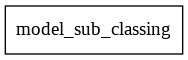

In [ ]:
sub_classing_model.summary()
plot_model(sub_classing_model,to_file='sub_classing_mode_api.png')

In [ ]:
# The testing step
test_loss, test_acc = sub_classing_model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)
print('test_loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9771
test_acc: 0.9771000146865845
test_loss: 0.08512797206640244
